In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Same Error to all points

Original y values: [15 15 17 11  7 17 13  7  3  7]
x values: [7 7 8 5 3 8 6 3 1 3]
Noise: [ 0.10849081 -0.19353593  0.10841868  0.46141097 -0.01074781  0.4693931
 -0.78592353  0.24657075  0.02611412 -0.08970221]
Noisy y values: [15.10849081 14.80646407 17.10841868 11.46141097  6.98925219 17.4693931
 12.21407647  7.24657075  3.02611412  6.91029779]


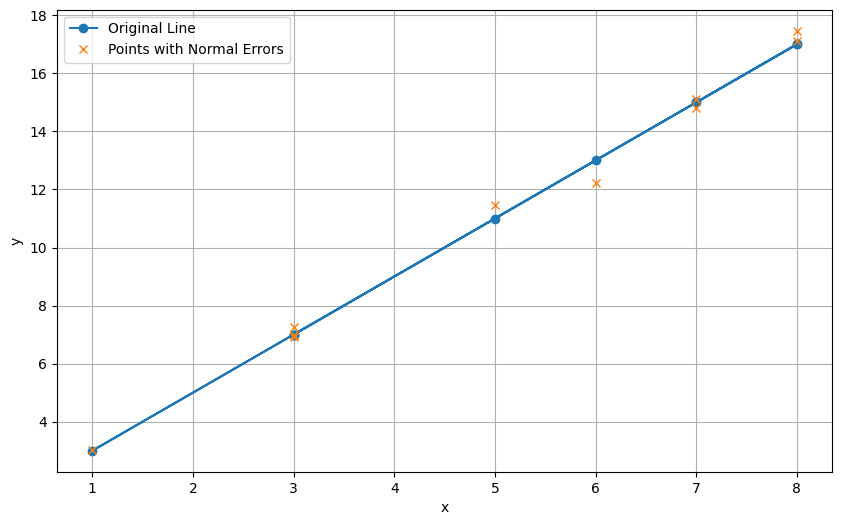

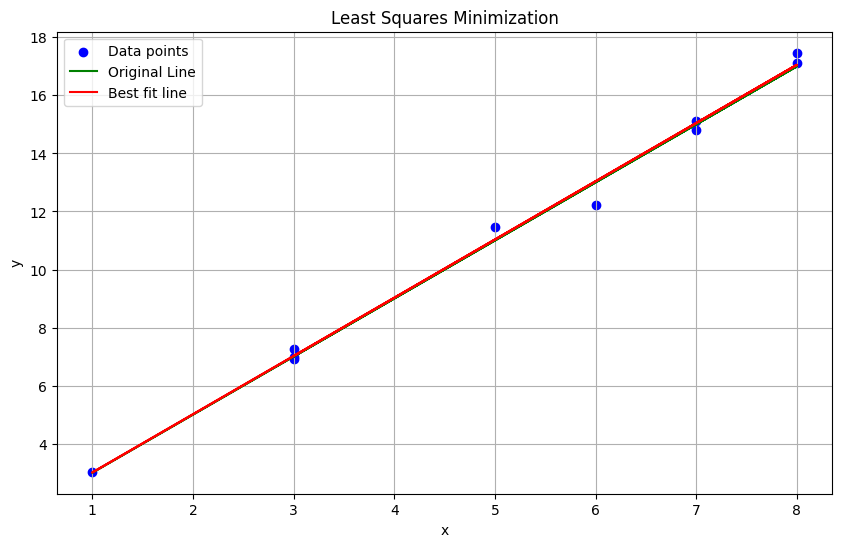

Slope (b): 2.006314657926191
Intercept (a): 1.0018441398917886


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true slope and intercept of the line
m = 2
c = 1

# Generate random x values
x_values = np.random.randint(1, 10, 10)

# Generate corresponding y values using the line equation y = mx + c
y_values = m * x_values + c

print("Original y values:", y_values)
print("x values:", x_values)

# Generate normal noise
mu, sigma = 0, 0.3  # mean and standard deviation
noise = np.random.normal(mu, sigma, 10)
print("Noise:", noise)

# Add noise to y values to create noisy data
y_noisy = y_values + noise
print("Noisy y values:", y_noisy)

# Plot the original line and noisy data points
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label='Original Line')
plt.plot(x_values, y_noisy, 'x', label='Points with Normal Errors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Compute the necessary sums for the least squares method
n = len(x_values)
sum_xy = np.sum(x_values * y_noisy)
sum_x = np.sum(x_values)
sum_y = np.sum(y_noisy)
sum_x_squared = np.sum(x_values ** 2)

# Calculate the slope (b) and intercept (a) using the least squares formulas (Since standard deviation is same for all points it gets cancelled out ) 
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
a = (sum_y - b * sum_x) / n



# Calculate the best fit line values
y_fit = a + b * x_values

# Plot the data and the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_noisy, color='blue', label='Data points')
plt.plot(x_values, y_values, color='green', label='Original Line')
plt.plot(x_values, y_fit, color='red', label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Least Squares Minimization')
plt.legend()
plt.show()
print(f"Slope (b): {b}")
print(f"Intercept (a): {a}")


# Gradient Descent Solution

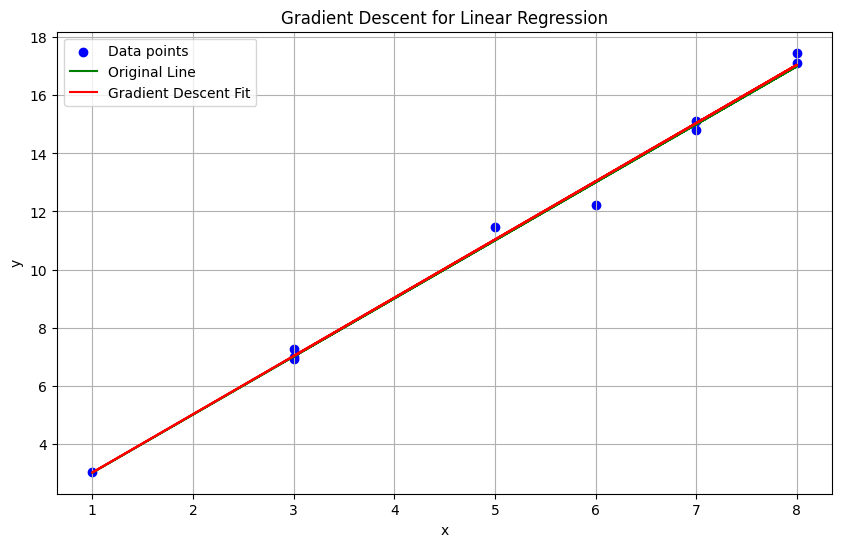

Gradient Descent - Slope (m): 2.006314657926199
Gradient Descent - Intercept (c): 1.001844139891741


In [33]:
# Gradient Descent function
def gradient_descent(x, y, learning_rate=0.01, num_iterations=10000):
    m = 0  # Initial slope
    c = 0  # Initial intercept
    n = len(x)
    
    for _ in range(num_iterations):
        # Compute predictions
        y_pred = m * x + c
        
        # Compute gradients
        dm = (-2/n) * np.sum(x * (y - y_pred))
        dc = (-2/n) * np.sum(y - y_pred)
        
        # Update parameters
        m -= learning_rate * dm
        c -= learning_rate * dc
    
    return m, c

# Perform gradient descent
m_gd, c_gd = gradient_descent(x_values, y_noisy)

# Calculate the best fit line values
y_fit_gd = m_gd * x_values + c_gd

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_noisy, color='blue', label='Data points')
plt.plot(x_values, y_values, color='green', label='Original Line')
plt.plot(x_values, y_fit_gd, color='red', label='Gradient Descent Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Gradient Descent for Linear Regression')
plt.legend()
plt.show()

print(f"Gradient Descent - Slope (m): {m_gd}")
print(f"Gradient Descent - Intercept (c): {c_gd}")

# Different Errors to each point

Original x values: [4 4 5 7 7 4 7 3 6 2]
Original y values: [ 9  9 11 15 15  9 15  7 13  5]
Errors (Standard deviations) used: [0.34974162 0.21825347 0.1421977  0.28261383 0.18737617 0.26660398
 0.4533121  0.22973801 0.14883518 0.24251914]
Noise added to each y value: [ 0.10849081 -0.19353593  0.10841868  0.46141097 -0.01074781  0.4693931
 -0.78592353  0.24657075  0.02611412 -0.08970221]
Noisy y values: [ 8.90970203  9.10060516 10.80811984 14.71199594 15.02379907  8.66689333
 15.88174445  6.96477279 12.86500839  4.80177598]


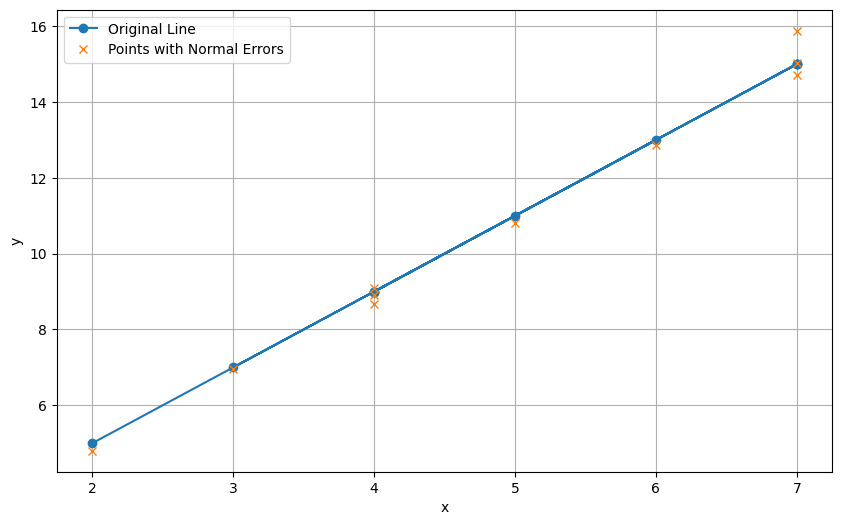

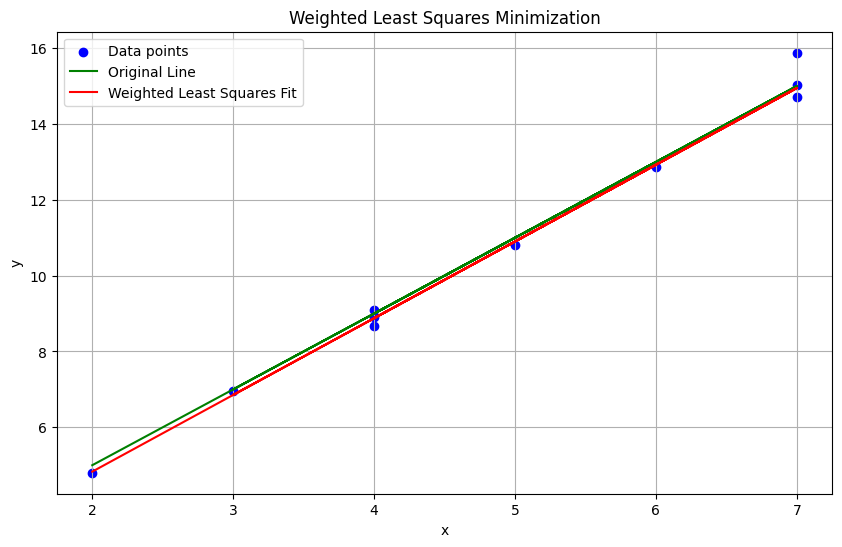

Slope (b): 2.0236852743047242
Intercept (a): 0.7828576956432403


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true slope and intercept of the line
m = 2
c = 1

# Generate random x values
x_values = np.random.randint(1, 10, 10)

# Generate corresponding y values using the line equation y = mx + c
y_values = m * x_values + c

# Generate different errors (standard deviations) for each point
errors = np.random.uniform(0.1, 0.5, 10)  # Different standard deviations

# Add noise to y values based on different errors
y_noisy = y_values + np.random.normal(0, errors)

print("Original x values:", x_values)
print("Original y values:", y_values)
print("Errors (Standard deviations) used:", errors)
print("Noise added to each y value:", noise)
print("Noisy y values:", y_noisy)
# Plot the original line and noisy data points
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o-', label='Original Line')
plt.plot(x_values, y_noisy, 'x', label='Points with Normal Errors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Calculate weights as the inverse of the square of the errors
weights = 1 / errors**2

# Compute the necessary weighted sums for the weighted least squares method
sum_w = np.sum(weights)
sum_wx = np.sum(weights * x_values)
sum_wy = np.sum(weights * y_noisy)
sum_wxy = np.sum(weights * x_values * y_noisy)
sum_wx_squared = np.sum(weights * x_values ** 2)

# Calculate the slope (b) and intercept (a) using the weighted least squares formulas
b = (sum_w * sum_wxy - sum_wx * sum_wy) / (sum_w * sum_wx_squared - sum_wx ** 2)
a = (sum_wy - b * sum_wx) / sum_w

# Calculate the best fit line values
y_fit = a + b * x_values

# Plot the data and the best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_noisy, color='blue', label='Data points')
plt.plot(x_values, y_values, color='green', label='Original Line')
plt.plot(x_values, y_fit, color='red', label='Weighted Least Squares Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Weighted Least Squares Minimization')
plt.legend()
plt.show()

print(f"Slope (b): {b}")
print(f"Intercept (a): {a}")


# Gradient Descent for Different Errrors

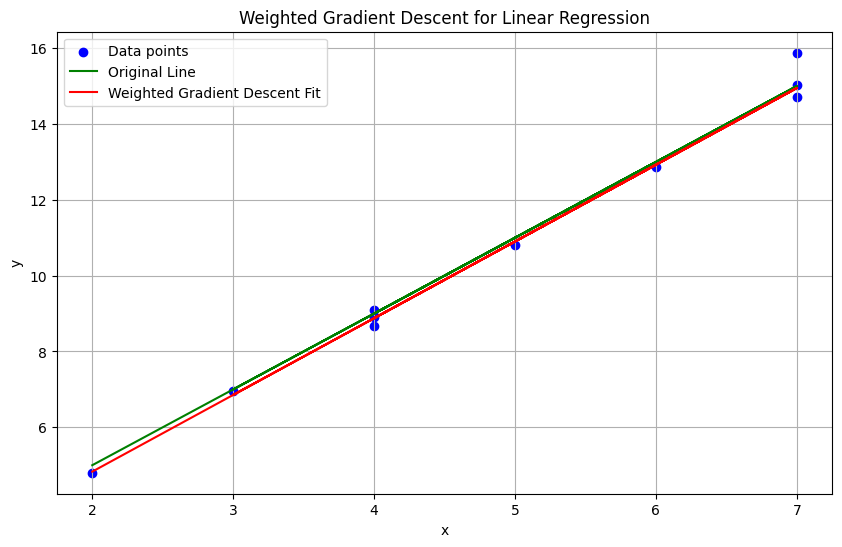

Weighted Gradient Descent - Slope (m): 2.0236852394686826
Weighted Gradient Descent - Intercept (c): 0.7828578848518681


In [35]:
# Calculate weights as the inverse of the square of the errors
weights = 1 / errors**2

# Normalize the data
x_mean = np.mean(x_values)
x_std = np.std(x_values)
y_mean = np.mean(y_noisy)
y_std = np.std(y_noisy)

x_normalized = (x_values - x_mean) / x_std
y_normalized = (y_noisy - y_mean) / y_std

# Weighted Gradient Descent function
def weighted_gradient_descent(x, y, weights, learning_rate=0.01, num_iterations=10000):
    m = 0  # Initial slope
    c = 0  # Initial intercept
    n = len(x)
    
    for _ in range(num_iterations):
        # Compute predictions
        y_pred = m * x + c
        
        # Compute weighted gradients
        dm = (-2/n) * np.sum(weights * x * (y - y_pred))
        dc = (-2/n) * np.sum(weights * (y - y_pred))
        
        # Update parameters
        m -= learning_rate * dm
        c -= learning_rate * dc
        
        # Break if the updates are very small
        if abs(learning_rate * dm) < 1e-8 and abs(learning_rate * dc) < 1e-8:
            break
    
    return m, c

# Perform weighted gradient descent
m_normalized, c_normalized = weighted_gradient_descent(x_normalized, y_normalized, weights)

# Denormalize the parameters
m_gd = m_normalized * (y_std / x_std)
c_gd = (c_normalized * y_std + y_mean) - (m_normalized * x_mean * y_std / x_std)

# Calculate the best fit line values
y_fit_gd = m_gd * x_values + c_gd

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_noisy, color='blue', label='Data points')
plt.plot(x_values, y_values, color='green', label='Original Line')
plt.plot(x_values, y_fit_gd, color='red', label='Weighted Gradient Descent Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Weighted Gradient Descent for Linear Regression')
plt.legend()
plt.show()

print(f"Weighted Gradient Descent - Slope (m): {m_gd}")
print(f"Weighted Gradient Descent - Intercept (c): {c_gd}")